## [REBOUH Nacereddine & BACHA Yassine | M2 IV - Groupe 2]

# TP 2 TAIV: Exo 2

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from google.colab import drive

drive.mount('/content/drive')
root_path = 'drive/My Drive/TAIV/TP2'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[[  0  12  53  32 190  53 174  53   0]
 [ 57  32  12 227 219 202  32 154   0]
 [ 65  85  93 239 251 227  65 158   0]
 [ 73 146 146 247 255 235 154 130   0]
 [ 97 166 117 231 243 210 117 117   0]
 [117 190  36 146 178  93  20 170   0]
 [130 202  73  20  12  53  85 194   0]
 [146 206 130 117  85 166 182 215   0]
 [  0   0   0   0   0   0   0   0   0]]


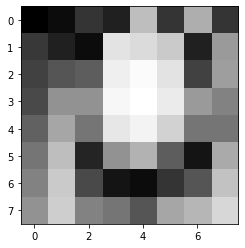

In [55]:
# image=cv2.imread(root_path+'/test.jpg', 0) 


image = np.array([[0, 12, 53, 32, 190, 53, 174, 53],
                  [57, 32, 12, 227, 219, 202, 32, 154],
                  [65, 85, 93, 239, 251, 227, 65, 158],
                  [73, 146, 146, 247, 255, 235, 154, 130],
                  [97, 166, 117, 231, 243, 210, 117, 117],
                  [117, 190, 36, 146, 178, 93, 20, 170],
                  [130, 202, 73, 20, 12, 53, 85, 194], 
                  [146, 206, 130, 117, 85, 166, 182, 215] ])

height=len(image)
width=len(image[0])
matrix=np.insert(image, len(image[0]), 0, axis=1)
matrix=np.insert(matrix, len(image), 0, axis=0)

print(matrix)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

## 1) Le gradient de l’image I’ dans les directions **x** et **y**.

8 8
[[  57.   20.  -41.  195.   29.  149. -142.  101.]
 [   8.   53.   81.   12.   32.   25.   33.    4.]
 [   8.   61.   53.    8.    4.    8.   89.  -28.]
 [  24.   20.  -29.  -16.  -12.  -25.  -37.  -13.]
 [  20.   24.  -81.  -85.  -65. -117.  -97.   53.]
 [  13.   12.   37. -126. -166.  -40.   65.   24.]
 [  16.    4.   57.   97.   73.  113.   97.   21.]
 [-146. -206. -130. -117.  -85. -166. -182. -215.]]


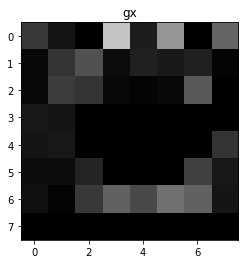

[[  12.   41.  -21.  158. -137.  121. -121.  -53.]
 [ -25.  -20.  215.   -8.  -17. -170.  122. -154.]
 [  20.    8.  146.   12.  -24. -162.   93. -158.]
 [  73.    0.  101.    8.  -20.  -81.  -24. -130.]
 [  69.  -49.  114.   12.  -33.  -93.    0. -117.]
 [  73. -154.  110.   32.  -85.  -73.  150. -170.]
 [  72. -129.  -53.   -8.   41.   32.  109. -194.]
 [  60.  -76.  -13.  -32.   81.   16.   33. -215.]]


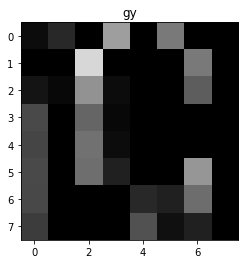

In [13]:
gx = np.zeros((height, width))
gy = np.zeros((height, width))
print(height, width)
for i in range(height):
  for j in range(width):
    #i cant get my head around which is the X derivative and which is the Y's..in the first one i followed profTp, and in the second one i followed the internet ,and i got similaire results to how should the output of prewitt and sobel
    gx[i][j] = matrix[i+1][j] - matrix[i][j]
    gy[i][j] = matrix[i][j+1] - matrix[i][j]
    # gy[i][j] = matrix[i+1][j] - matrix[i][j]
    # gx[i][j] = matrix[i][j+1] - matrix[i][j]

print(gx)
plt.title("gx")
plt.imshow(gx, cmap='gray', vmin=0, vmax=255)
plt.show()
print(gy)
plt.title("gy")
plt.imshow(gy, cmap='gray', vmin=0, vmax=255)
plt.show()

##2) 1- **La magnitude** (mode) du gradient

In [15]:
#Q2
man_g = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        man_g[i][j] = (gx[i][j]**2) + (gy[i][j]**2)
        man_g[i][j] = np.sqrt(man_g[i][j])

np.set_printoptions(precision=3)
print(man_g)

[[ 58.249  45.618  46.065 250.976 140.036 191.943 186.561 114.061]
 [ 26.249  56.648 229.752  14.422  36.235 171.828 126.384 154.052]
 [ 21.541  61.522 155.322  14.422  24.331 162.197 128.725 160.462]
 [ 76.844  20.    105.081  17.889  23.324  84.77   44.102 130.648]
 [ 71.84   54.562 139.846  85.843  72.897 149.459  97.    128.445]
 [ 74.148 154.467 116.056 130.    186.497  83.241 163.478 171.686]
 [ 73.756 129.062  77.833  97.329  83.726 117.444 145.911 195.133]
 [157.848 219.572 130.648 121.297 117.414 166.769 184.968 304.056]]


## 2) 2- **L'orientation** (direction) du gradient

In [16]:
#Q3
direct_g = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        direct_g[i][j] = math.degrees(np.arctan(gy[i][j] / gx[i][j]))
print(direct_g)

[[ 11.889  63.997  27.121  39.016 -78.048  39.079  40.435 -27.688]
 [-72.255 -20.674  69.356 -33.69  -27.979 -81.634  74.864 -88.512]
 [ 68.199   7.472  70.048  56.31  -80.538 -87.173  46.259  79.951]
 [ 71.801   0.    -73.98  -26.565  59.036  72.848  32.969  84.289]
 [ 73.836 -63.905 -54.605  -8.036  26.917  38.48   -0.    -65.63 ]
 [ 79.902 -85.544  71.409 -14.25   27.115  61.28   66.571 -81.964]
 [ 77.471 -88.224 -42.917  -4.715  29.32   15.811  48.334 -83.822]
 [-22.341  20.251   5.711  15.297 -43.62   -5.505 -10.277  45.   ]]


##3) **Binarisation** avec un seuil de 70 

In [17]:
s=70
binary = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        if(man_g[i][j]>s):
            binary[i][j]=1

print(binary)

[[0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


## 4) **Dilatation** avec un élément structurant de type diamant 

In [18]:
# Q4
dilatation=np.array(binary, copy=True)
expand=1
for i in range(1,height-1):
  for j in range(1,width-1):
    expand=1
    if(binary[i][j]==0):
      if(binary[i-1][j]==0):
        if(binary[i][j-1]==0):
          if(binary[i][j+1]==0):
            if(binary[i+1][j]==0):
              expand=0
  
    dilatation[i][j]=expand
    dilatation[i-1][j]=expand
    dilatation[i][j-1]=expand
    dilatation[i][j+1]=expand
    dilatation[i+1][j]=expand

print(dilatation)

[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


##5) **Erosion** avec un élément structurant de type carée

In [19]:
# Q5
Erosion=np.array(binary, copy=True)
erode=0
for i in range(1,height-1):
  for j in range(1,width-1):
    erode=0
    if(binary[i-1][j-1]==1):
      if(binary[i-1][j]==1):
        if(binary[i-1][j+1]==1):
          if(binary[i][j-1]==1):
            if(binary[i][j]==1):
              if(binary[i][j+1]==1):
                if(binary[i+1][j-1]==1):
                  if(binary[i+1][j]==1):
                    if(binary[i+1][j+1]==1):
                      erode=1
    
    Erosion[i-1][j-1]=erode
    Erosion[i-1][j]=erode
    Erosion[i-1][j+1]=erode
    Erosion[i][j-1]=erode
    Erosion[i][j]=erode
    Erosion[i][j+1]=erode
    Erosion[i+1][j-1]=erode
    Erosion[i+1][j]=erode
    Erosion[i+1][j+1]=erode

print(Erosion)

[[0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


##6) **Horizontal** and **Vertical** gradient with ***Sobel*** and ***prewitt*** kernels

1- **Vertical**(par rapport x) gradient with **prewitt** kernel (C=1):♒

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0  12  53  32 190  53 174  53   0]
 [  0  57  32  12 227 219 202  32 154   0]
 [  0  65  85  93 239 251 227  65 158   0]
 [  0  73 146 146 247 255 235 154 130   0]
 [  0  97 166 117 231 243 210 117 117   0]
 [  0 117 190  36 146 178  93  20 170   0]
 [  0 130 202  73  20  12  53  85 194   0]
 [  0 146 206 130 117  85 166 182 215   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[[  89.  101.  271.  458.  648.  453.  388.  186.]
 [ 138.  178.  320.  308.  442.  126.  170.   -4.]
 [ 130.  264.  268.  190.   89.  191.  131.   98.]
 [ 113.  137.   97.    8.  -33.   27.   -6.   11.]
 [  88.  -22. -167. -288. -320. -353. -236.  -94.]
 [  69.   25. -219. -486. -599. -420. -112.   45.]
 [  45.  139.   81.  -28.  -49.  142.  280.  207.]
 [-332. -405. -295. -105.  -85. -150. -332. -279.]]


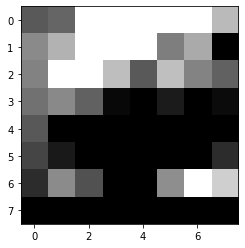

In [45]:
C=1
gx_masque=np.array([[-1,-C,-1],[0,0,0],[1,C,1]])
print(gx_masque)

gx_copy = np.array(image, copy=True)
prewitt_gx = np.zeros([height,width])
gx_copy=np.insert(gx_copy, 0, 0, axis=1)
gx_copy=np.insert(gx_copy, 0, 0, axis=0)
gx_copy=np.insert(gx_copy, len(gx_copy[0]), 0, axis=1)
gx_copy=np.insert(gx_copy, len(gx_copy), 0, axis=0)

print(gx_copy)

for i in range(1,height+1):
  for j in range(1,width+1) :
    somme=gx_copy[i-1][j-1]*gx_masque[0][0]+gx_copy[i-1][j]*gx_masque[0][1]+gx_copy[i-1][j+1]*gx_masque[0][2]+gx_copy[i][j-1]*gx_masque[1][0]+gx_copy[i][j]*gx_masque[1][1]+gx_copy[i][j+1]*gx_masque[1][2]+gx_copy[i+1][j-1]*gx_masque[2][0]+gx_copy[i+1][j]*gx_masque[2][1]+gx_copy[i+1][j+1]*gx_masque[2][2]
    prewitt_gx[i-1][j-1]=somme

print(prewitt_gx)
plt.imshow(prewitt_gx, cmap='gray', vmin=0, vmax=255)
plt.show()

2- **Horizontal**(par rapport y) gradient with **prewitt** kernel (C=1):♒

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[  44.    8.  215.  344.   -4. -203.  -48. -206.]
 [ 129.   36.  369.  502.  -16. -389. -117. -271.]
 [ 263.   56.  450.  474.  -49. -474. -222. -251.]
 [ 397.  121.  320.  393.  -45. -413. -267. -336.]
 [ 502.   12.  122.  377.  -86. -385. -121. -291.]
 [ 558. -118. -161.  207.  -41. -211.  125. -222.]
 [ 598. -154. -315.   36.   29.   12.  267. -287.]
 [ 408.  -73. -271. -106.   82.  170.  190. -267.]]


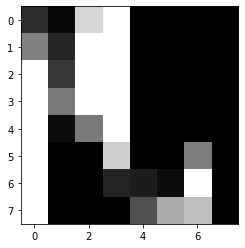

In [48]:
C=1
gy_masque=np.array([[-1,0,1],[-C,0,C],[-1,0,1]])
print(gy_masque)

gy_copy = np.array(image, copy=True)
prewitt_gy=np.zeros([height,width])
gy_copy=np.insert(gy_copy, 0, 0, axis=1)
gy_copy=np.insert(gy_copy, 0, 0, axis=0)
gy_copy=np.insert(gy_copy, len(gy_copy[0]), 0, axis=1)
gy_copy=np.insert(gy_copy, len(gy_copy), 0, axis=0)

for i in range(1,height+1):
  for j in range(1,width+1):
    somme=gy_copy[i-1][j-1]*gy_masque[0][0]+gy_copy[i-1][j]*gy_masque[0][1]+gy_copy[i-1][j+1]*gy_masque[0][2]+gy_copy[i][j-1]*gy_masque[1][0]+gy_copy[i][j]*gy_masque[1][1]+gy_copy[i][j+1]*gy_masque[1][2]+gy_copy[i+1][j-1]*gy_masque[2][0]+gy_copy[i+1][j]*gy_masque[2][1]+gy_copy[i+1][j+1]*gy_masque[2][2]
    prewitt_gy[i-1][j-1]=somme

print(prewitt_gy)
plt.imshow(prewitt_gy, cmap='gray', vmin=0, vmax=255)
plt.show()

3- **Vertical**(par rapport x) gradient with **sobel** kernel (C=2):♒:

[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[ 146.  133.  283.  685.  867.  655.  420.  340.]
 [ 203.  251.  360.  515.  503.  300.   61.  101.]
 [ 146.  378.  402.  210.  125.  224.  253.   74.]
 [ 145.  218.  121.    0.  -41.   10.   46.  -30.]
 [ 132.   22. -277. -389. -397. -495. -370.  -54.]
 [ 102.   61. -263. -697. -830. -577. -144.  122.]
 [  74.  155.  175.  -57. -142.  215.  442.  252.]
 [-462. -607. -368. -125.  -97. -203. -417. -473.]]


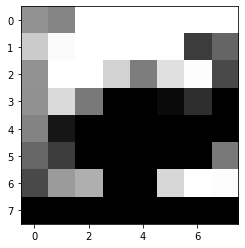

In [50]:
C=2
gx_masque=np.array([[-1,-C,-1],[0,0,0],[1,C,1]])
print(gx_masque)
sobel_gx=np.zeros([height,width])
for i in range(1,height+1):
  for j in range(1,width+1):
    somme=gx_copy[i-1][j-1]*gx_masque[0][0]+gx_copy[i-1][j]*gx_masque[0][1]+gx_copy[i-1][j+1]*gx_masque[0][2]+gx_copy[i][j-1]*gx_masque[1][0]+gx_copy[i][j]*gx_masque[1][1]+gx_copy[i][j+1]*gx_masque[1][2]+gx_copy[i+1][j-1]*gx_masque[2][0]+gx_copy[i+1][j]*gx_masque[2][1]+gx_copy[i+1][j+1]*gx_masque[2][2]
    sobel_gx[i-1][j-1]=somme

print(sobel_gx)
plt.imshow(sobel_gx, cmap='gray', vmin=0, vmax=255)
plt.show()

4- **Horizontal**(par rapport y) gradient with **sobel** kernel (C=2):♒


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[  56.   61.  235.  481.   17. -219.  -48. -380.]
 [ 161.   -9.  564.  709.  -41. -576. -165. -303.]
 [ 348.   84.  604.  632.  -61. -660. -291. -316.]
 [ 543.  194.  421.  502.  -57. -514. -372. -490.]
 [ 668.   32.  187.  503. -107. -511. -214. -408.]
 [ 748. -199. -205.  349.  -94. -369.  202. -242.]
 [ 800. -211. -497.  -25.   62.   85.  408. -372.]
 [ 614.  -89. -360. -151.  131.  267.  239. -449.]]


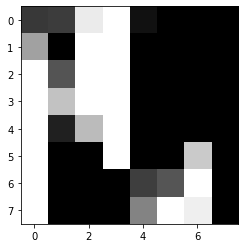

In [51]:
C=2
gy_masque=np.array([[-1,0,1],[-C,0,C],[-1,0,1]])
print(gy_masque)  
soble_gy=np.zeros([height,width])
for i in range(1,height+1):
  for j in range(1,width+1):
    somme=gy_copy[i-1][j-1]*gy_masque[0][0]+gy_copy[i-1][j]*gy_masque[0][1]+gy_copy[i-1][j+1]*gy_masque[0][2]+gy_copy[i][j-1]*gy_masque[1][0]+gy_copy[i][j]*gy_masque[1][1]+gy_copy[i][j+1]*gy_masque[1][2]+gy_copy[i+1][j-1]*gy_masque[2][0]+gy_copy[i+1][j]*gy_masque[2][1]+gy_copy[i+1][j+1]*gy_masque[2][2]
    soble_gy[i-1][j-1]=somme

print(soble_gy)
plt.imshow(soble_gy, cmap='gray', vmin=0, vmax=255)
plt.show()

##7) **Second order** derivative using **Laplacian** mask (filter)

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]
[[  0   0  12  53  32 190  53 174  53  53]
 [  0   0  12  53  32 190  53 174  53  53]
 [ 57  57  32  12 227 219 202  32 154 154]
 [ 65  65  85  93 239 251 227  65 158 158]
 [ 73  73 146 146 247 255 235 154 130 130]
 [ 97  97 166 117 231 243 210 117 117 117]
 [117 117 190  36 146 178  93  20 170 170]
 [130 130 202  73  20  12  53  85 194 194]
 [146 146 206 130 117  85 166 182 215 215]
 [146 146 206 130 117  85 166 182 215 215]]
[[  69.   49. -103.  374. -266.  407. -384.  222.]
 [ -74.   38.  357. -406.   -6. -277.  467. -219.]
 [  20.   -4.  110. -138.  -64. -155.  311. -125.]
 [  89. -114.   19. -117.  -44.  -94.  -69.   39.]
 [  65. -114.  111. -171.  -98. -152.   33.   66.]
 [  66. -239.  382. -119. -218.   89.  385. -179.]
 [  75. -209.   96.  268.  288.  144.  109. -112.]
 [  44. -140.    6. -116.   40. -178.  -80.  -54.]]


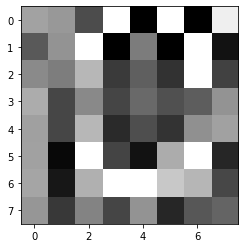

In [53]:
laplacian_masque=np.array([[0,1,0],[1,-4,1],[0,1,0]])
print(laplacian_masque)  
lap_img=np.pad(image, (1, 1), 'symmetric')
print(lap_img)
laplacian_matrix=np.zeros([height, width])
for i in range(1,height+1):
  for j in range(1,width+1):
    somme=lap_img[i-1][j-1]*laplacian_masque[0][0]+lap_img[i-1][j]*laplacian_masque[0][1]+lap_img[i-1][j+1]*laplacian_masque[0][2]+lap_img[i][j-1]*laplacian_masque[1][0]+lap_img[i][j]*laplacian_masque[1][1]+lap_img[i][j+1]*laplacian_masque[1][2]+lap_img[i+1][j-1]*laplacian_masque[2][0]+lap_img[i+1][j]*laplacian_masque[2][1]+lap_img[i+1][j+1]*laplacian_masque[2][2]
    laplacian_matrix[i-1][j-1]=somme
print(laplacian_matrix)
plt.imshow(laplacian_matrix, cmap='gray', vmin=-255, vmax=255)
plt.show()

## 8) Filtrage avec filtre moyen (linéaire):

[[ 18.889  25.667  51.667 112.    133.111 143.    105.333 100.   ]
 [ 41.444  45.444  87.222 146.222 182.222 157.    124.222 111.222]
 [ 72.556  78.778 136.333 187.667 233.556 182.222 150.778 126.111]
 [ 96.333 109.778 163.333 202.444 237.556 195.222 157.    127.333]
 [119.556 120.889 158.333 177.667 204.222 167.222 138.444 125.   ]
 [138.444 125.333 131.222 117.333 131.778 112.333 117.667 131.556]
 [153.778 136.667 124.444  88.556  96.667  97.111 130.889 160.556]
 [162.    152.111 133.444  85.444  91.222 112.889 162.    188.556]]


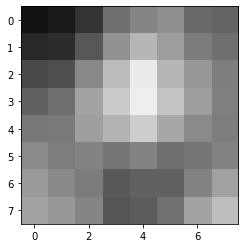

In [54]:
moyen_matrix = np.zeros([height, width])

for i in range(1, height+1):
  for j in range(1, width+1):
    moyen_matrix[i-1][j-1] = (lap_img[i-1][j-1] + lap_img[i-1][j] + lap_img[i-1][j+1] + lap_img[i][j-1] + lap_img[i][j] + lap_img[i][j+1] + lap_img[i+1][j-1] + lap_img[i+1][j] + lap_img[i+1][j+1]) / 9

print(moyen_matrix)
plt.imshow(moyen_matrix, cmap='gray', vmin=0, vmax=255)
plt.show()

## 9)  Filtrage avec filtre gaussien (linéaire) avec sigma = 1:

[[  78.45  115.34  228.77  506.71  676.46  652.16  532.34  465.2 ]
 [ 209.06  209.43  389.5   742.79  946.45  772.37  572.32  556.23]
 [ 346.15  392.1   621.62  964.17 1152.03  923.8   673.64  636.67]
 [ 453.48  565.4   773.8  1030.57 1176.68  993.86  745.2   635.79]
 [ 562.49  634.98  734.33  910.75 1035.63  849.42  649.55  612.01]
 [ 656.7   658.02  581.84  591.03  665.63  539.29  509.44  658.67]
 [ 730.07  720.86  548.94  388.51  405.6   436.1   590.33  809.79]
 [ 775.28  794.51  646.85  439.12  444.15  591.72  802.99  949.48]]


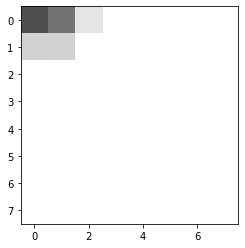

In [62]:
gauss_filter = np.array([[.36, .61, .37],
                         [.61,   1,  .6],
                         [.37,  .6, .36]])

gauss_matrix = np.zeros([height, width])
for i in range(1,height+1):
  for j in range(1,width+1):
    somme=lap_img[i-1][j-1]*gauss_filter[0][0]+lap_img[i-1][j]*gauss_filter[0][1]+lap_img[i-1][j+1]*gauss_filter[0][2]+lap_img[i][j-1]*gauss_filter[1][0]+lap_img[i][j]*gauss_filter[1][1]+lap_img[i][j+1]*gauss_filter[1][2]+lap_img[i+1][j-1]*gauss_filter[2][0]+lap_img[i+1][j]*gauss_filter[2][1]+lap_img[i+1][j+1]*gauss_filter[2][2]
    gauss_matrix[i-1][j-1]=somme

print(gauss_matrix)
plt.imshow(gauss_matrix, cmap='gray', vmin=0, vmax=255)
plt.show()

## 10)  Filtrage avec filtre médian (non linéaire):

[[ 12.  12.  32.  53. 190. 174.  53.  53.]
 [ 57.  53.  53. 190. 219. 190. 154. 154.]
 [ 65.  73. 146. 227. 235. 219. 154. 154.]
 [ 85.  97. 146. 239. 239. 227. 154. 130.]
 [117. 117. 146. 178. 231. 178. 130. 130.]
 [130. 117. 146. 117. 146.  93. 117. 117.]
 [146. 130. 130.  85.  93.  85. 166. 182.]
 [146. 146. 130.  85.  85.  85. 182. 194.]]


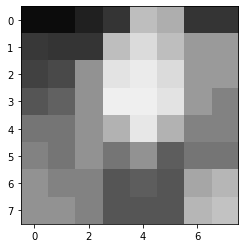

In [69]:
median_matrix = np.zeros([height, width])
for i in range(1,height+1):
  for j in range(1,width+1):
    temp = []
    temp.append(lap_img[i-1][j-1])
    temp.append(lap_img[i-1][j])
    temp.append(lap_img[i-1][j+1])
    temp.append(lap_img[i][j-1])
    temp.append(lap_img[i][j])
    temp.append(lap_img[i][j+1])
    temp.append(lap_img[i+1][j-1])
    temp.append(lap_img[i+1][j])
    temp.append(lap_img[i+1][j+1])
    temp.sort()
    median_matrix[i-1][j-1] = temp[4]

print(median_matrix)
plt.imshow(median_matrix, cmap='gray', vmin=0, vmax=255)
plt.show()